In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
from funcoes import *
from skimage.color import rgb2gray
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage as ndi

os.chdir('C:\\Users\\rthiago\\OneDrive\\IA Expert\\Segmentação\\Imagens') # para o notebook

# os.chdir('C:\\Users\\thi-m\\OneDrive\\Documentos\\Thiago\\IA_Expert\\Segmentação\\Imagens') # para o desktop

Segmentação por cores

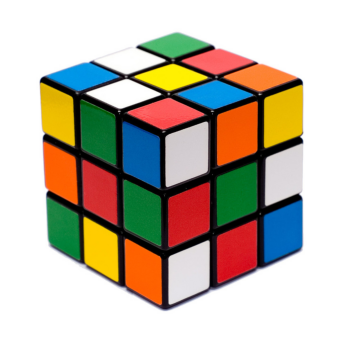

In [2]:
img = cv.imread('cubo_magico.jpg')
mostrar(img)

Segmentação com RGB

In [3]:
cor_min = (90, 10, 0)
cor_max = (255, 180, 40)

In [4]:
maximo = np.array(cor_min, dtype='uint8')
minimo = np.array(cor_max, dtype='uint8')

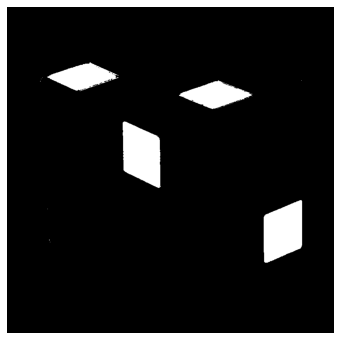

In [5]:
mascara = cv.inRange(img, cor_min, cor_max)
mostrar(mascara)

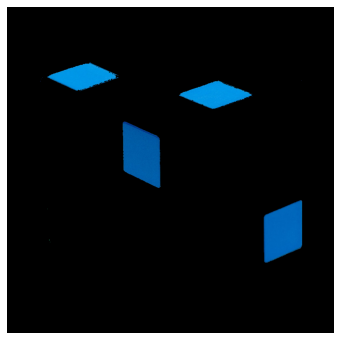

In [6]:
segmento_cor = cv.bitwise_and(img, img, mask=mascara)
mostrar(segmento_cor)


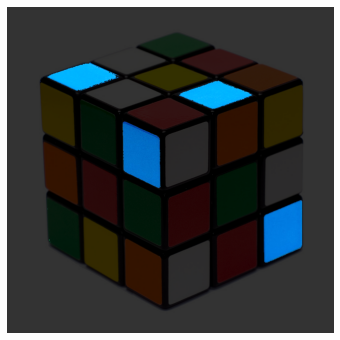

In [8]:
seg_sobreposicao = cv.addWeighted(segmento_cor,1, img, 0.2, 0)
mostrar(seg_sobreposicao)

In [11]:
cores = [
    ([90,10,0],[255,180,40]),   #azul
    ([0,80,0],[120,255,120]),   #verde
    ([8,8,160],[120,120,255]),  #vermelho
    ([0,150,200],[10,255,255]), #amarelo
    ([0,80,240],[80,165,255])   #laranja
]

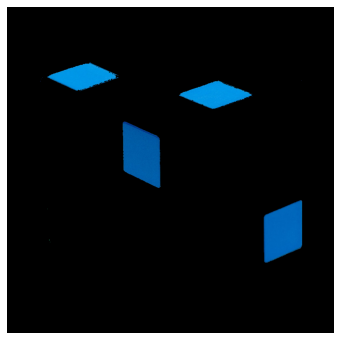

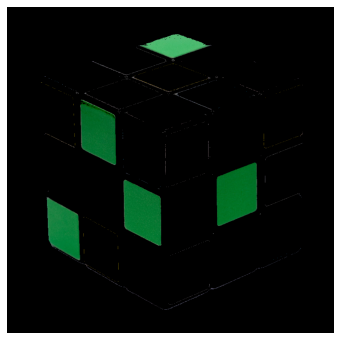

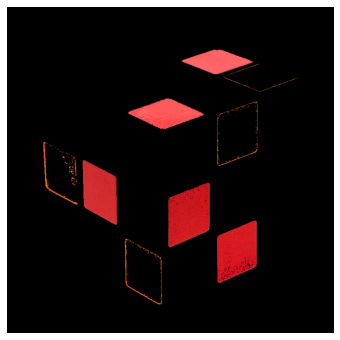

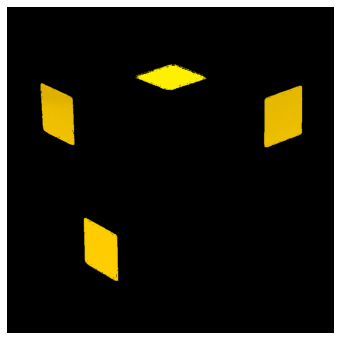

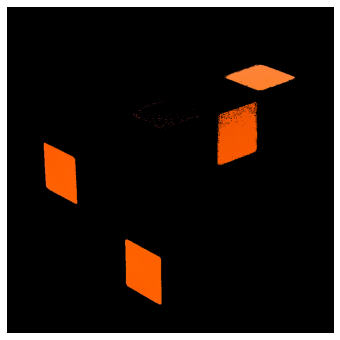

In [14]:
for (minimo, maximo) in cores:
    minimo = np.array(minimo, dtype='uint8')
    maximo = np.array(maximo, dtype='uint8')
    mascara = cv.inRange(img, minimo, maximo)
    segmento = cv.bitwise_and(img, img, mask=mascara)
    mostrar(segmento)

Segmentação no espaço HSV

In [15]:
img = cv.imread('cubo_magico.jpg')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

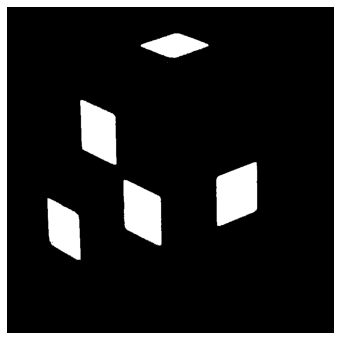

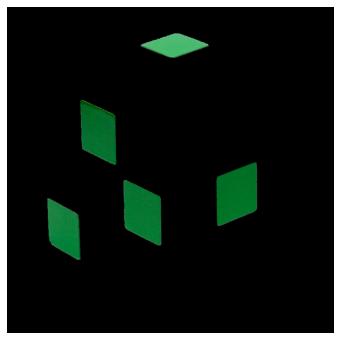

In [18]:
minimo = (45,80, 40)
maximo = (75, 255, 255)
mascara = cv.inRange(img_hsv, minimo, maximo)
mostrar(mascara)
segmento = cv.bitwise_and(img, img, mask=mascara)
mostrar(segmento)


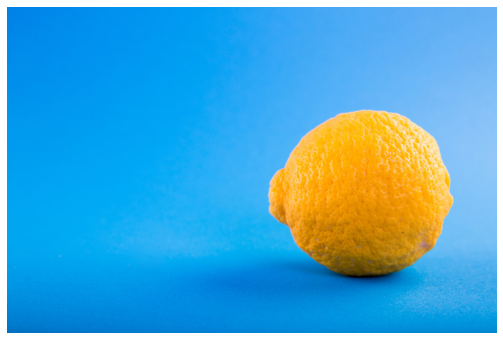

In [19]:
img = cv.imread('limao_amarelo.jpg')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
mostrar(img)

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import  cm, colors

In [25]:
cores_pixels = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(cores_pixels)
cores_pixels = norm(cores_pixels).tolist()

Text(0.5, 0, 'Azul')

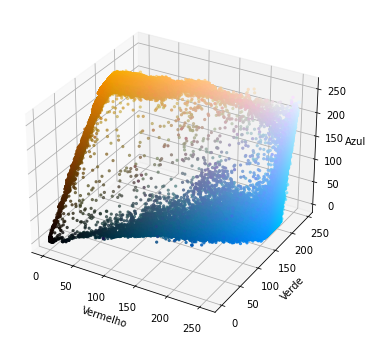

In [28]:
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
r, g, b = cv.split(rgb)
fig = plt.figure()
fig.set_size_inches(8,6)
axis = fig.add_subplot(1,1,1,projection='3d')
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=cores_pixels, marker='.')
axis.set_xlabel('Vermelho')
axis.set_ylabel('Verde')
axis.set_zlabel('Azul')


Text(0.5, 0, 'Valor')

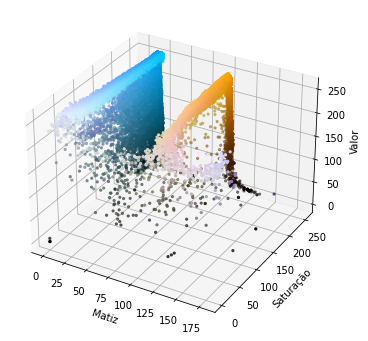

In [29]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
fig = plt.figure()
fig.set_size_inches(8,6)
axis = fig.add_subplot(1,1,1,projection='3d')
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=cores_pixels, marker='.')
axis.set_xlabel('Matiz')
axis.set_ylabel('Saturação')
axis.set_zlabel('Valor')

Text(0.5, 0, 'Valor')

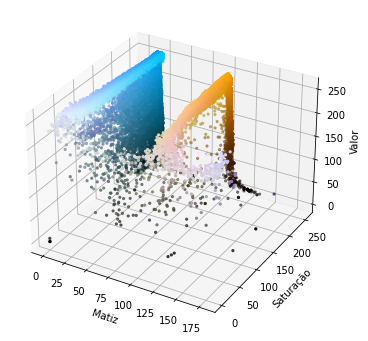

In [30]:
img = cv.imread('limao_amarelo.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
fig = plt.figure()
fig.set_size_inches(8,6)
axis = fig.add_subplot(1,1,1,projection='3d')
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=cores_pixels, marker='.')
axis.set_xlabel('Matiz')
axis.set_ylabel('Saturação')
axis.set_zlabel('Valor')

Text(0.5, 0, 'Valor')

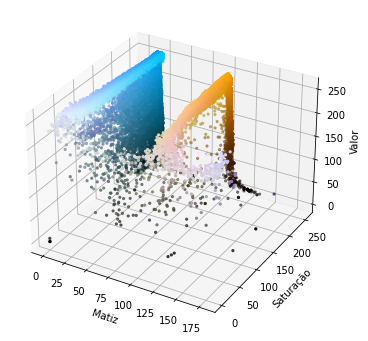

In [34]:
img = cv.imread('limao_amarelo.jpg')
cores_pixels = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(cores_pixels)
cores_pixels = norm(cores_pixels).tolist()
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
fig = plt.figure()
fig.set_size_inches(8,6)
axis = fig.add_subplot(1,1,1,projection='3d')
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=cores_pixels, marker='.')
axis.set_xlabel('Matiz')
axis.set_ylabel('Saturação')
axis.set_zlabel('Valor')

Efeito Chroma-key

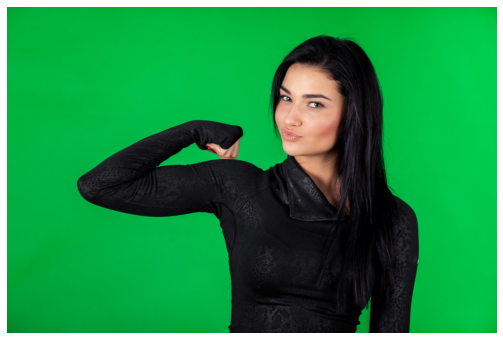

In [35]:
img = cv.imread('chromakey.jpg')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
mostrar(img)

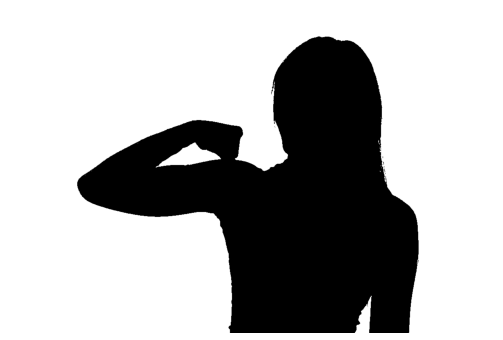

In [36]:
minimo = np.array((40,80,40), dtype='uint8')
maximo = np.array((80,255,255), dtype='uint8')
mascara = cv.inRange(img_hsv, minimo, maximo)
mostrar(mascara)


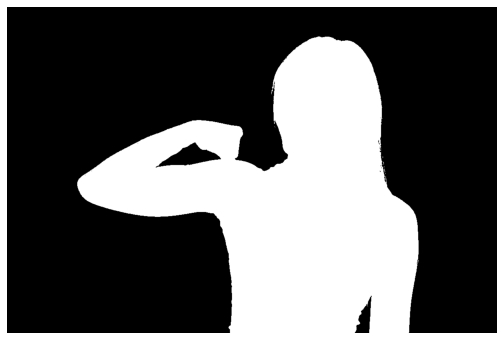

In [37]:
mascara = 255 - mascara
mostrar(mascara)

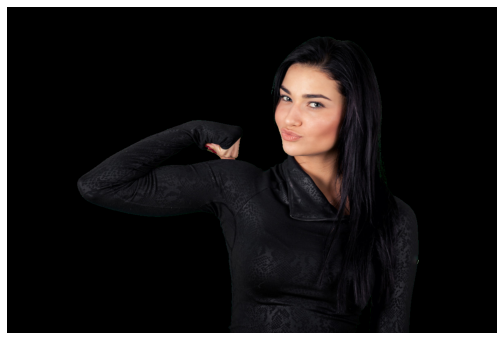

In [38]:
segmento = cv.bitwise_and(img, img, mask=mascara)
mostrar(segmento)

In [40]:
altura, largura = img.shape[:2]

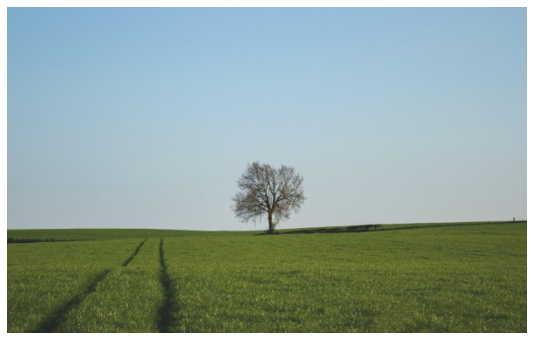

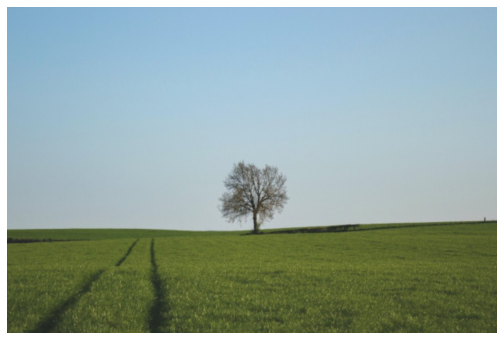

In [41]:
img_final = img.copy()
fundo = cv.imread('paisagem01.jpg')
mostrar(fundo)
fundo = cv.resize(fundo, (largura, altura))
mostrar(fundo)

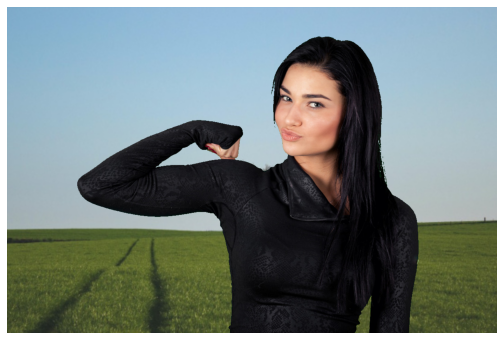

In [42]:
img_final[mascara==0] = fundo[mascara == 0]
mostrar(img_final)

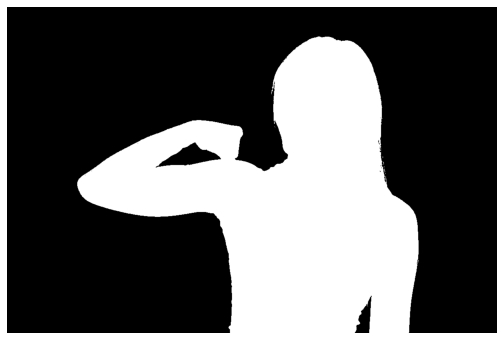

In [43]:
mostrar(mascara)

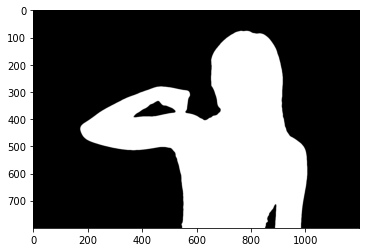

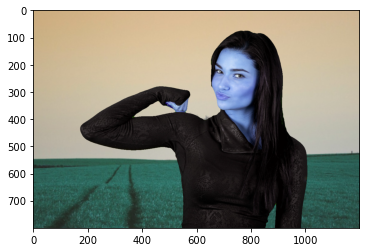

In [50]:
import skimage.exposure
mascara_suave = mascara.copy()
mascara_suave = cv.GaussianBlur(mascara_suave, (0,0), sigmaX=3, sigmaY=3, borderType=cv.BORDER_DEFAULT)
mascara_suave = skimage.exposure.rescale_intensity(mascara_suave, in_range=(150, 190), out_range=(0,255))
plt.imshow(mascara_suave, cmap='gray')
plt.show()

img_final = img.copy()
img_final[mascara_suave==0] = fundo[mascara_suave==0]
plt.imshow(img_final, cmap='gray')